In [3]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

In [4]:
df = pd.read_csv("./results/oob/mm_oob_avg.csv")
pd.options.display.max_rows = 999
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
time_cols = ["conversion_in0",	"conversion_in1",	"transfer_in0",	"transfer_in1",	"tilization_in0",	"tilization_in1", "inference_avg"]
for col in time_cols:
    if col in df.columns:
        df[col] = df[col].values * 1e6
df

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,inference_avg,iters
0,f16_m2,256,0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,1072.550506,232.376059,342.613456,272.511757,302.413649,326.189481,324.045452,100
1,f16_m2,512,0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,625.405369,269.174042,646.599156,591.594133,355.342114,391.269157,358.096740,100
2,f16_m2,1024,0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,431.384836,234.397778,1001.261622,960.751011,421.855939,350.298916,497.144578,100
3,f16_m2,2048,0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,369.345576,215.893482,3495.176064,3474.491796,713.619176,687.716346,1174.391553,100
4,f16_m2,3072,0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,3831.074351,518.067881,8124.618875,7795.636582,1736.703629,1599.688956,2578.712808,100
5,f16_m2,4096,0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,1859.439162,412.375517,13971.955918,13750.508623,2362.840415,2216.013666,4792.118637,100
6,f16_m4,256,0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,255.281120,210.975584,319.831279,439.688506,527.613403,249.401610,333.309499,100
7,f16_m4,512,0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,434.234238,224.204765,782.775527,376.692069,299.511163,259.727877,329.552619,100
8,f16_m4,1024,0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,516.316762,246.590554,1035.296214,974.504174,383.942649,354.160985,500.449667,100
9,f16_m4,2048,0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,406.473084,225.625016,3658.072552,3476.812168,717.390660,708.434984,1177.879151,100


In [5]:
conf_infos = dict()
infs = ['in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m2': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'},
 'f16_m4': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi4'}}

In [6]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

## Data movement 

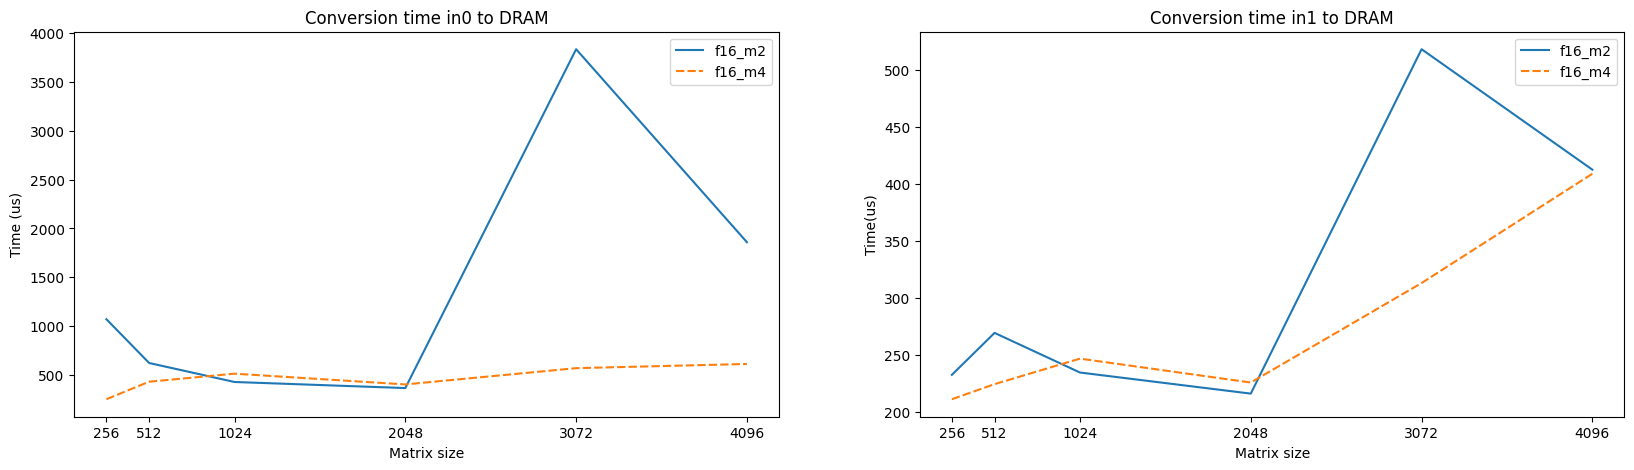

In [7]:
df_conversion0 = get_column_df_info(df, 'conversion_in0', mean=True) 
df_conversion1 = get_column_df_info(df, 'conversion_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_conversion0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Conversion time in0 to DRAM")

plot = sns.lineplot(df_conversion1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Conversion time in1 to DRAM")

plt.show()

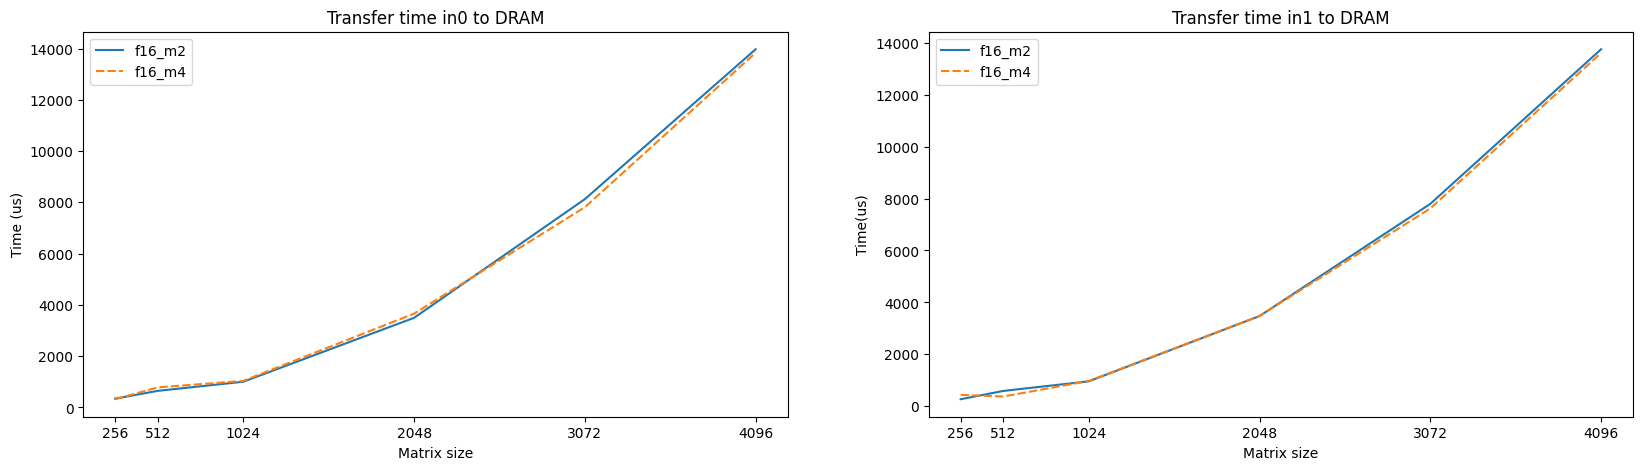

In [8]:
df_transf0 = get_column_df_info(df, 'transfer_in0', mean=True) 
df_transf1 = get_column_df_info(df, 'transfer_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_transf0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer time in0 to DRAM")

plot = sns.lineplot(df_transf1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Transfer time in1 to DRAM")

plt.show()


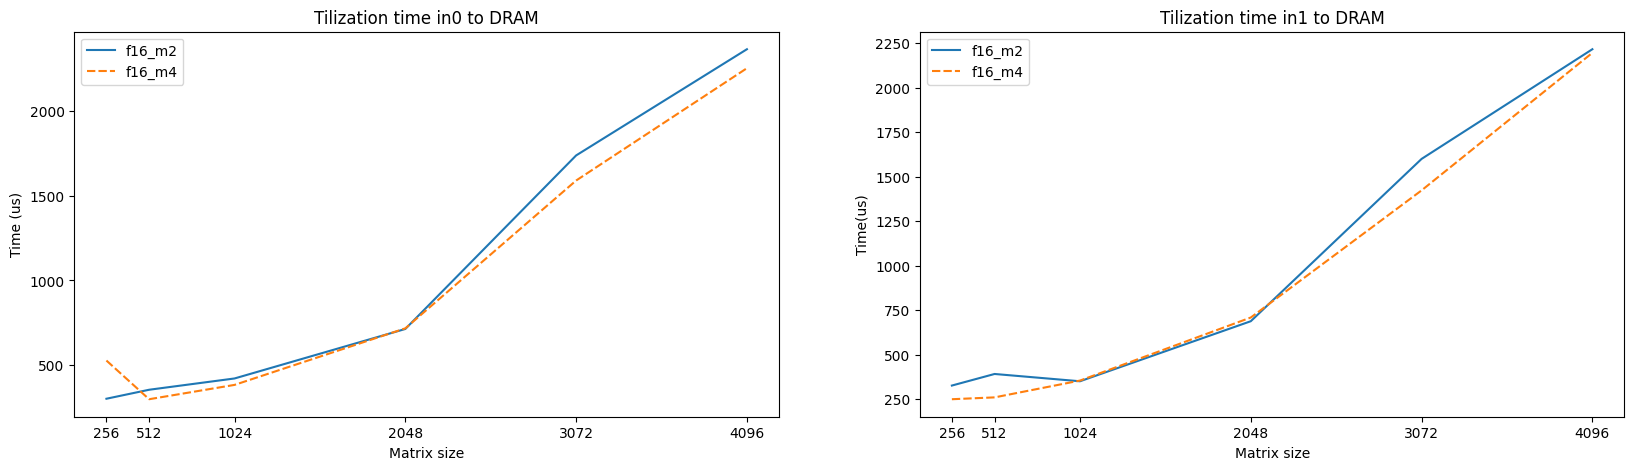

In [9]:
df_tilization0 = get_column_df_info(df, 'tilization_in0', mean=True) 
df_tilization1 = get_column_df_info(df, 'tilization_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_tilization0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Tilization time in0 to DRAM")

plot = sns.lineplot(df_tilization1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Tilization time in1 to DRAM")

plt.show()


### Calculate Mb/s transfer

In [10]:
df_transf_norm_b = pd.DataFrame()
elements = df_transf0.index * df_transf0.index
for conf in df_transf0.columns:
    df_transf_norm_b[conf] = (16 * elements) / df_transf0[conf]

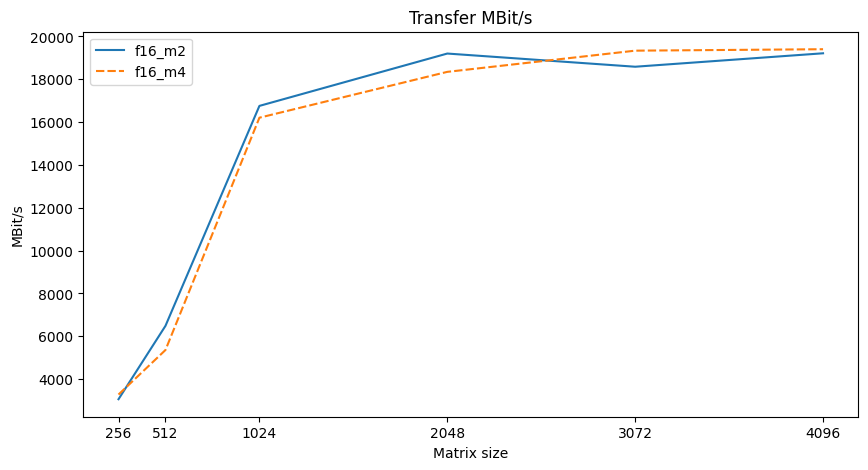

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("MBit/s")
plot.set_title("Transfer MBit/s")

plt.show()

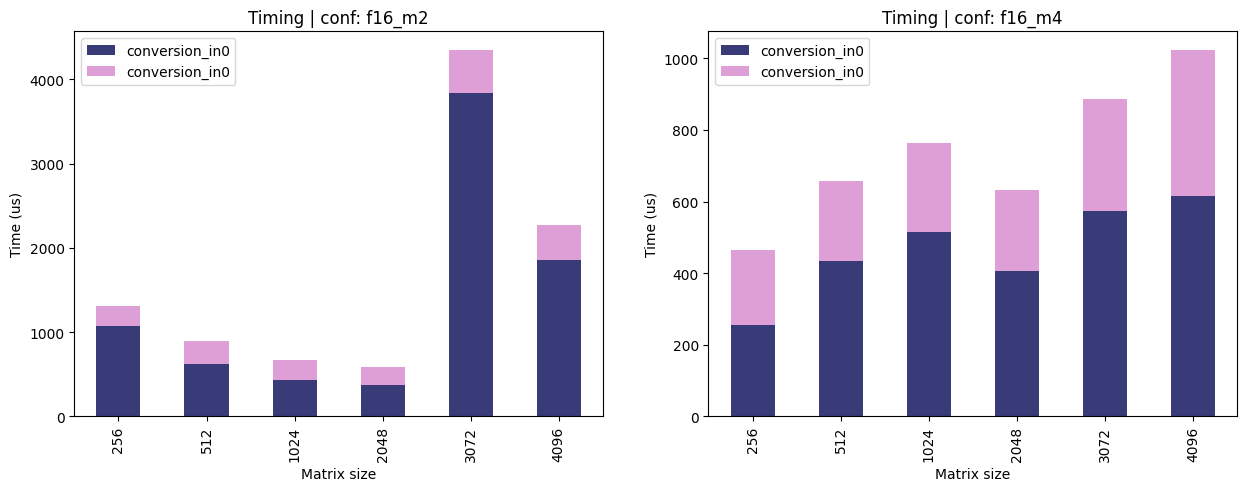

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_transf0.columns:
    df_combined = pd.concat([df_conversion0[conf], df_conversion1[conf]], axis=1)
    df_combined.columns = ["conversion_in0", "conversion_in0"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j], colormap="tab20b")
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

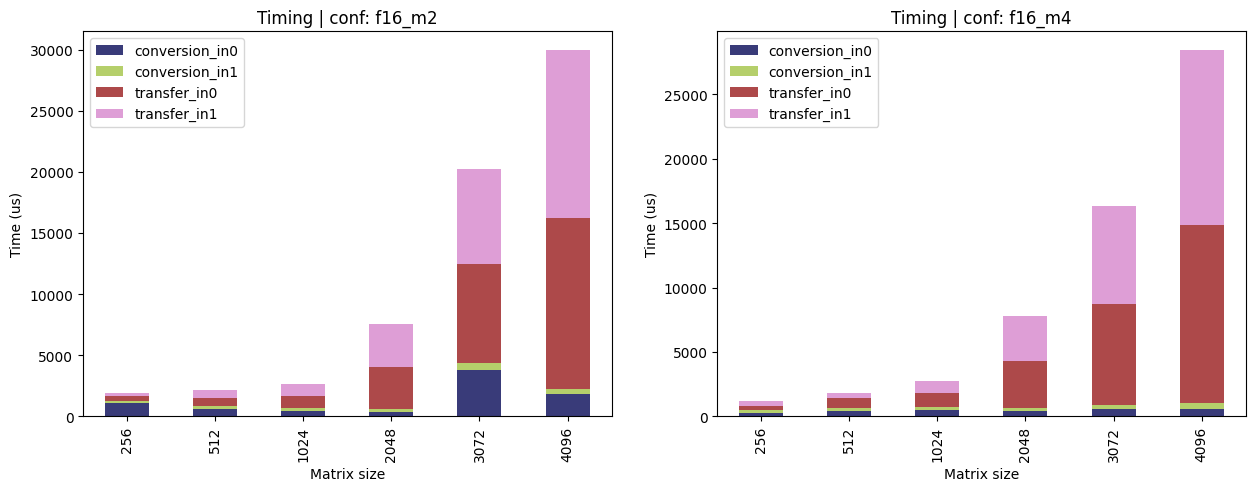

In [13]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_transf0.columns:
    df_combined = pd.concat([df_conversion0[conf], df_conversion1[conf], df_transf0[conf], df_transf1[conf]], axis=1)
    df_combined.columns = ["conversion_in0", "conversion_in1", "transfer_in0", "transfer_in1"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j], colormap="tab20b")
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

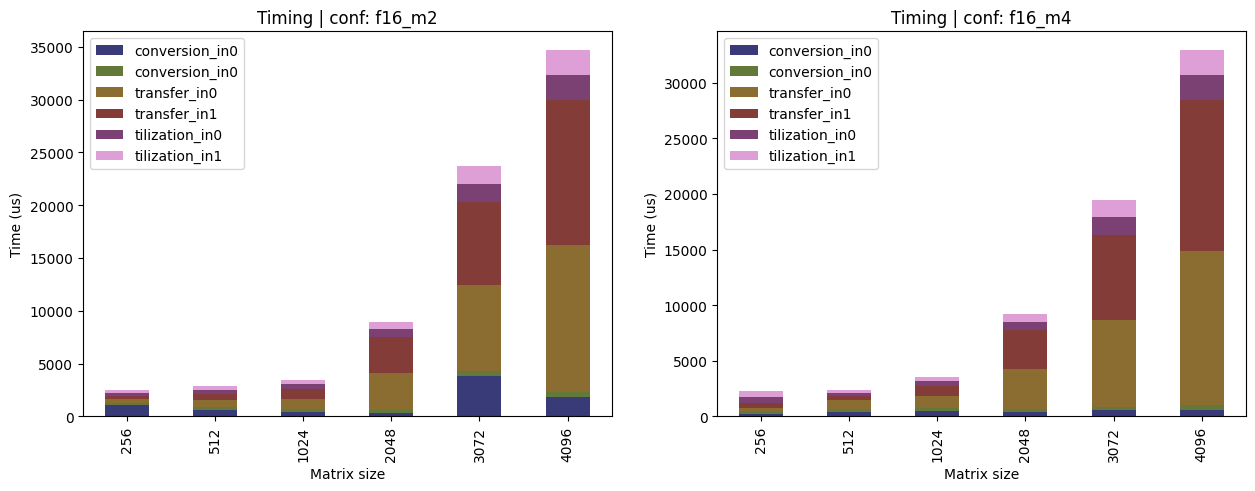

In [14]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_transf0.columns:
    df_combined = pd.concat([df_conversion0[conf], df_conversion1[conf], df_transf0[conf], df_transf1[conf], df_tilization0[conf], df_tilization0[conf]], axis=1)
    df_combined.columns = ["conversion_in0", "conversion_in0", "transfer_in0", "transfer_in1", "tilization_in0", "tilization_in1"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j], colormap="tab20b")
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

In [16]:
df_data_mv = df_conversion0 + df_conversion1 + df_transf0 + df_transf1 + df_tilization0 + df_tilization0
df_data_mv

,f16_m2,f16_m4
256,2524.879076,2281.003296
512,2843.456929,2416.928923
1024,3471.507124,3540.593001
2048,8982.145269,9201.764140
3072,23742.804947,19493.447291
4096,34719.960051,32968.251211


## Inference

In [17]:
df_avg = get_column_df_info(df, 'inference_avg')
df_avg

,f16_m2,f16_m4
256,324.045452,333.309499
512,358.096740,329.552619
1024,497.144578,500.449667
2048,1174.391553,1177.879151
3072,2578.712808,2505.932025
4096,4792.118637,4775.388861


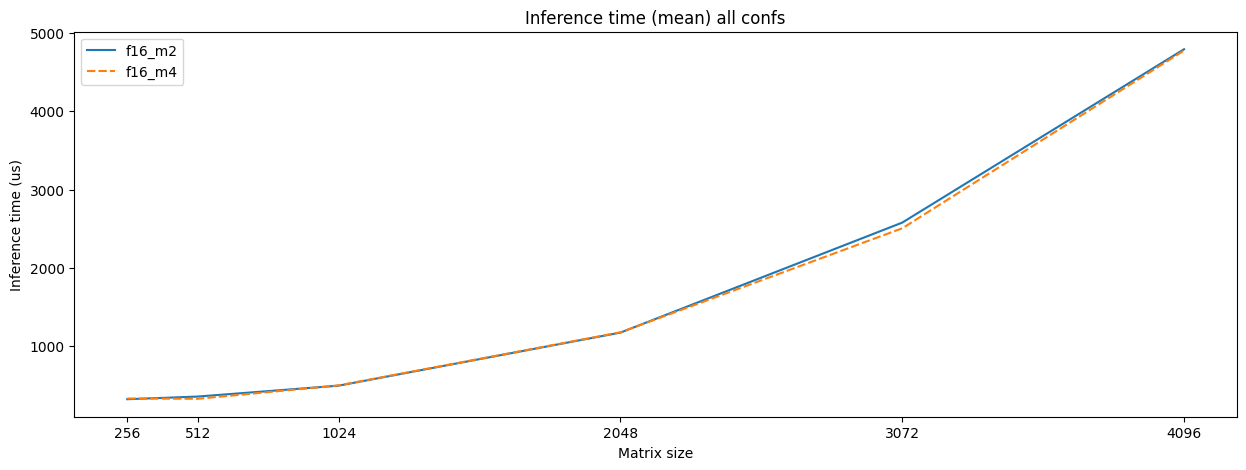

In [18]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_avg, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

In [20]:
df_avg_dtype = get_column_df_info(df, 'inference_avg', c_name='dtype', mean=True)
df_avg_dtype

,DataType.BFLOAT16
256,328.677476
512,343.824680
1024,498.797122
2048,1176.135352
3072,2542.322417
4096,4783.753749


In [21]:
df_avg_math_fidelity = get_column_df_info(df, 'inference_avg', c_name='math_fidelity', mean=True)
df_avg_math_fidelity

,MathFidelity.HiFi2,MathFidelity.HiFi4
256,324.045452,333.309499
512,358.096740,329.552619
1024,497.144578,500.449667
2048,1174.391553,1177.879151
3072,2578.712808,2505.932025
4096,4792.118637,4775.388861


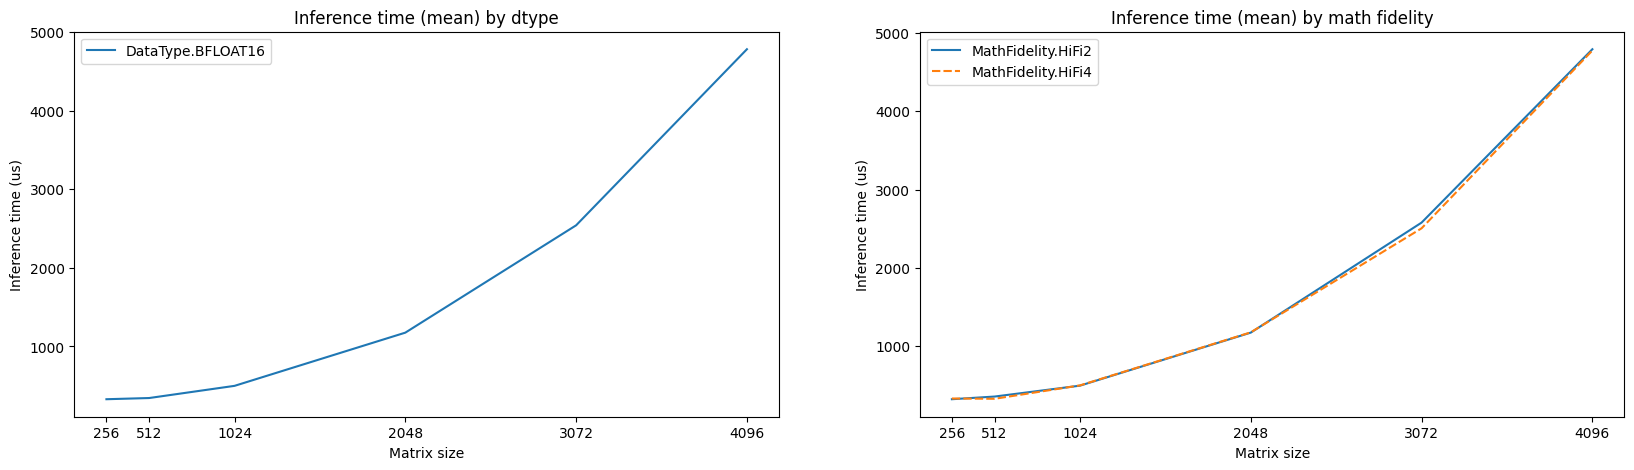

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

plot = sns.lineplot(df_avg_dtype, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) by dtype")

plot = sns.lineplot(df_avg_math_fidelity, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) by math fidelity")

plt.show()
